## Predator Prey Models Lotka-Volterra Lynx-Hare

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
from scipy import linalg
import pandas as pd
import math
%matplotlib notebook

In [42]:
plt.style.use('ggplot')

## Lynx-Hare 

In [43]:
Pred_prey_data = np.genfromtxt('hare_lynx_data.csv', delimiter=',', skip_header=1)

In [44]:
year = Pred_prey_data[:,0]
hare = Pred_prey_data[:,1]
lynx = Pred_prey_data[:,2]

<IPython.core.display.Javascript object>


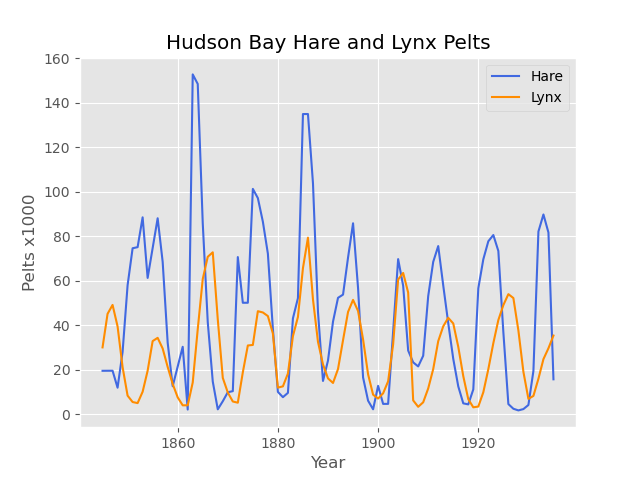

In [46]:
fig0, ax0 = plt.subplots()

In [47]:
ax0.plot(year,hare, color="royalblue",label="Hare")
ax0.plot(year,lynx, color = "darkorange",label="Lynx")
ax0.set_xlabel("Year")
ax0.set_ylabel("Pelts x1000")
ax0.set_title("Hudson Bay Hare and Lynx Pelts")
ax0.legend()

<IPython.core.display.Javascript object>


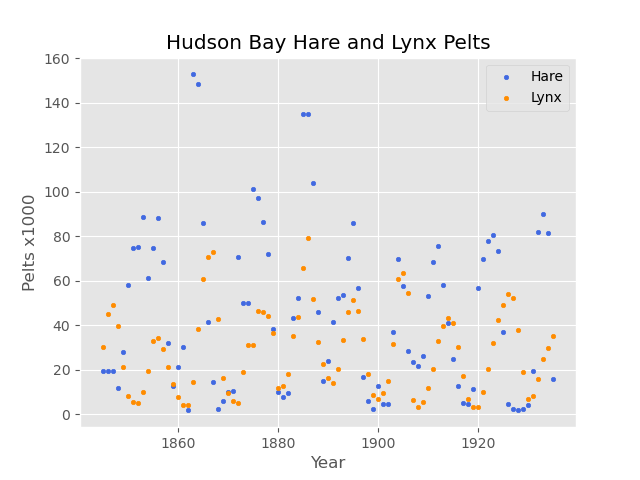

In [48]:
fig00, ax00= plt.subplots()

In [49]:
ax00.scatter(year,hare,color = "royalblue", s=10, label="Hare")
ax00.scatter(year,lynx, color = "darkorange",s=10, label="Lynx")
ax00.set_xlabel("Year")
ax00.set_ylabel("Pelts x1000")
ax00.set_title("Hudson Bay Hare and Lynx Pelts")
ax00.legend()

<IPython.core.display.Javascript object>


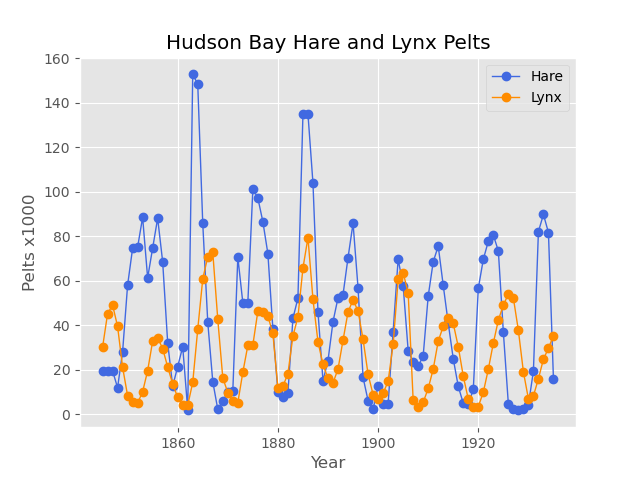

In [50]:
fig000, ax000 = plt.subplots()

In [51]:
ax000.plot(year, hare,'-o',color = "royalblue", linewidth=1, label="Hare")
ax000.plot(year, lynx,'-o', color = "darkorange",linewidth=1, label="Lynx")
ax000.set_xlabel("Year")
ax000.set_ylabel("Pelts x1000")
ax000.set_title("Hudson Bay Hare and Lynx Pelts")
ax000.legend()

<IPython.core.display.Javascript object>


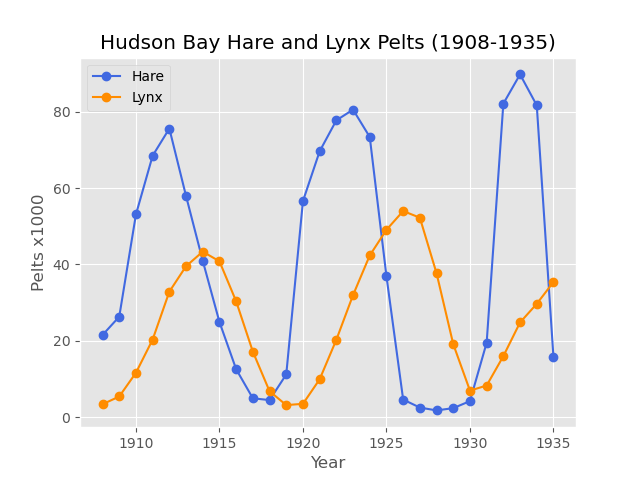

In [52]:
fig1, ax1 = plt.subplots()

In [53]:
ax1.plot(year[63:], hare[63:], '-o',color = "royalblue",label = "Hare")
ax1.plot(year[63:],lynx[63:],'-o',color = "darkorange", label="Lynx")

ax1.set_xlabel("Year")
ax1.set_ylabel("Pelts x1000")
ax1.set_title("Hudson Bay Hare and Lynx Pelts (1908-1935)")
ax1.legend()

<IPython.core.display.Javascript object>


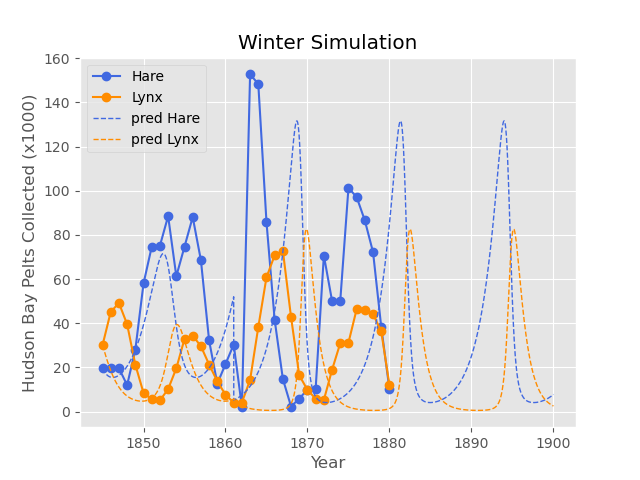

In [54]:
fig10, ax10 = plt.subplots()

In [55]:
ax10.plot(Pred_prey_data[:36,0], Pred_prey_data[:36,1], '-o',color = "royalblue",label = "Hare")
ax10.plot(Pred_prey_data[:36,0],Pred_prey_data[:36,2],'-o',color = "darkorange", label="Lynx")

ax10.set_xlabel("Year")
ax10.set_ylabel("Pelts x1000")
ax10.set_title("Hudson Bay Hare and Lynx Pelts (1845-1880)")
ax10.legend()

## General Predator Prey

### Equilibrium positions

## fmin

In [57]:
year=Pred_prey_data[63:,0]
hare=Pred_prey_data[63:,1]
lynx=Pred_prey_data[63:,2]

In [58]:
year

array([1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916.,
       1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925.,
       1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934.,
       1935.])

In [59]:
def sumSquaredError(hare, lynx, a1, a2, b1,b2) :
    dt = .01; max_time = 1935

    # initial time and populations size
    t = 1908; x = 21.54; y = 3.41

    # empty lists
    time_list = []; prey_list = []; pred_list = []

    # initialize lists
    time_list.append(t); prey_list.append(x); pred_list.append(y)

    while t < max_time:
        # calc new values for t, x, y
        t = t + dt
        x = x + (a1*x - a2*x*y)*dt
        y = y + (-b1*y + b2*x*y)*dt

        # store new values in lists
        time_list.append(t)
        prey_list.append(x)
        pred_list.append(y)
        
        
    error = sum( (hare-prey_list[0:-1:100])**2 + (lynx-pred_list[0:-1:100])**2 )
    
    
    return error 

In [60]:
sumSquare_adapter = lambda p: sumSquaredError(hare, lynx, p[0], p[1], p[2], p[3])

In [61]:
p = np.array([0.45372498, 0.02959179, 0.90423199, 0.0247327])#a1,a2,b1,b2

In [62]:
A5 = optimize.fmin(sumSquare_adapter, p)

Optimization terminated successfully.
         Current function value: 11070.287001
         Iterations: 86
         Function evaluations: 157


In [63]:

print(A5)
print(A5[0]/A5[1],A5[2]/A5[3])

[0.48370492 0.02959095 0.90427964 0.0247334 ]
16.346378732653896 36.5610704575228


In [64]:
# model parameters
a1 = A5[0]; a2 = A5[1]; b1 = A5[2];  b2 = A5[3]
dt = .01; max_time = 1935

# initial time and populations
t = 1908; x = 12.82; y = 7.13

# empty lists
time_list = []; prey_list = []; pred_list = []

# place first value in lists
time_list.append(t); prey_list.append(x); pred_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + (a1*x - a2*x*y)*dt
    y = y + (-b1*y + b2*x*y)*dt

    # store new values in lists
    time_list.append(t)
    prey_list.append(x)
    pred_list.append(y)

In [65]:
ODE_time=time_list
ODE_prey=prey_list
ODE_pred=pred_list

<IPython.core.display.Javascript object>


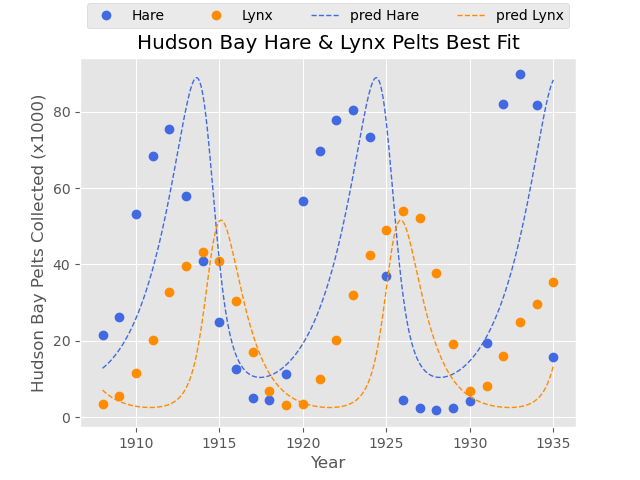

In [66]:
fig, ax=plt.subplots()

In [67]:
# Plot the results    
ax.plot(year, hare,'o', label = "Hare", color="royalblue")
ax.plot(year,lynx,'o', label="Lynx", color="darkorange")
ax.set_xlabel('Year')
ax.set_ylabel('Hudson Bay Pelts Collected (x1000)')
ax.plot(time_list, prey_list, "--",label="pred Hare", linewidth=1, color='royalblue')
ax.plot(time_list, pred_list,"--",label="pred Lynx", linewidth=1, color= 'darkorange')
ax.legend(bbox_to_anchor=(0,1.06,1,.2), loc="lower left", mode="expand", ncol=4)
ax.set_title("Hudson Bay Hare & Lynx Pelts Best Fit")

Text(0.5, 1.0, 'Hudson Bay Hare & Lynx Pelts Best Fit')

<IPython.core.display.Javascript object>


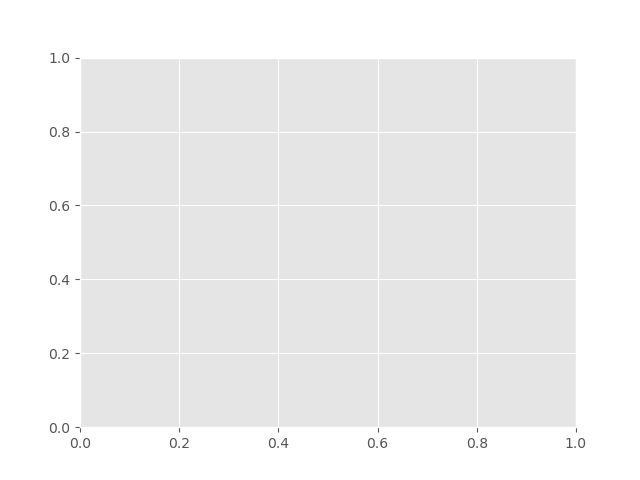

In [68]:
fig3, ax3 = plt.subplots()

In [69]:
# model parameters
a1 = A5[0]; a2 = A5[1]; b1 = A5[2];  b2 = A5[3]
dt = 0.01; max_time = 1900

# initial time and populations
t = 1845; x = 19.58; y = 30.09

# empty lists in which to store time and populations
time_list = []; prey_list = []; pred_list = []

# initialize lists
time_list.append(t); prey_list.append(x); pred_list.append(y)

Harsh_winter = True

while t < max_time:
    # calc new values for t, x, y
    t = t + dt

    if Harsh_winter and t>1861:
        x = 0.1 * x
        Harsh_winter = False

    x = x + (a1*x - a2*x*y)*dt
    y = y + (-b1*y + b2*x*y)*dt

    # store new values in lists
    time_list.append(t)
    prey_list.append(x)
    pred_list.append(y)



In [70]:
ax10.plot(time_list, prey_list, "--",label="pred Hare", linewidth=1, color='royalblue')
ax10.plot(time_list, pred_list,"--",label="pred Lynx", linewidth=1, color= 'darkorange')
ax10.set_xlabel('Year')
ax10.set_ylabel('Hudson Bay Pelts Collected (x1000)')
ax10.set_title("Winter Simulation")
ax10.legend()

In [71]:
def dZ_dt(x,y):
    x, y = x,y
    dxdt, dydt = x*(A5[0] - A5[1]*y), -y*(A5[2] - A5[3]*x)
    return [dxdt, dydt]

<IPython.core.display.Javascript object>


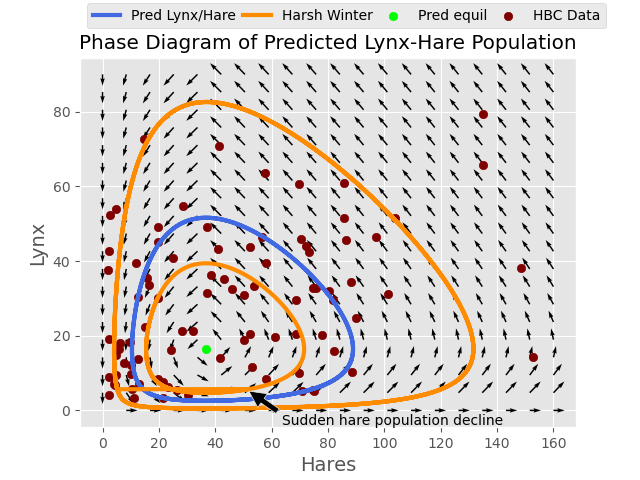

In [72]:
fig6, ax6 = plt.subplots()

In [73]:
x=np.linspace(0,160,20)
y=np.linspace(0,90,20)
X,Y = np.meshgrid(x,y)
U,V = dZ_dt(X,Y)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);
ax6.quiver(X,Y,U,V)

<ipython-input-73-f55fc74a8b78>:5: RuntimeWarning: invalid value encountered in true_divide
  U = U / np.sqrt(U**2 + V**2);


In [74]:
ax6.plot(ODE_prey,ODE_pred, linewidth=3,color = "royalblue",label="Pred Lynx/Hare")
ax6.plot(prey_list,pred_list, linewidth=3,color="darkorange", label="Harsh Winter")
ax6.scatter(A5[2]/A5[3],A5[0]/A5[1], color="lime", label = "Pred equil")
ax6.set_xlabel("Hares", fontsize=14)
ax6.set_ylabel("Lynx", fontsize=14)
ax6.scatter(Pred_prey_data[:,1],Pred_prey_data[:,2], color = "maroon", label="HBC Data")
ax6.set_title("Phase Diagram of Predicted Lynx-Hare Population")
ax6.legend(bbox_to_anchor=(0,1.06,1.075,.2), loc="lower left", mode="expand", ncol=4)

In [75]:
ax6.annotate('Sudden hare population decline', xy=(51.3, 5.5), xytext=(63.7, -4),
            arrowprops=dict(facecolor='black', shrink=0.05))

Text(63.7, -4, 'Sudden hare population decline')

In [78]:
# fig.savefig('Hare_lynx_bestfit.pdf')
# fig0.savefig('Hare_Lynx_raw.pdf')
# fig00.savefig("Hare_Lynx_scatter.pdf")
# fig000.savefig("Hare_Lynx_dotdash.pdf")
# fig1.savefig('Hare_lynx_1908_1935.pdf')
# fig3.savefig('Harsh_winter.pdf')
#fig6.savefig("phase_diagram_lynx_hare.pdf")